# CHILD Asthma Prediction 
    - Pipeline for multiple time points: Birth, 6m, 1y, 2y, 3y 
    - Identification of critical, stable predictors
    - Identification of minimal set of features 
    - Asthma Risk Stratification Model (0 - No risk, 1 - Minimal risk, 2 - Intermediate risk, 3 - High risk)

In [62]:
# Preferences of autoformatting & Multiple Output
%load_ext nb_black

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

import warnings

warnings.filterwarnings("ignore")

import researchpy as rp  # For auto-statistics/EDA of dataframe
from tqdm.notebook import tqdm  # For process display

import sys

sys.path.append("../src")

from data import *
from utils import *
from conf import *
from tools import *

import utils as UT

import random

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [15]:
df_raw = generate_raw_xlsx()

The path for all the CHILD data is located at ../data/
Generating a merged DataFrame For Analyzing and Modelling...
The DataFrame for ML is saved to ../output 


<IPython.core.display.Javascript object>

In [16]:
!ls ../output/

CHILD_ml_sample_dataset.xlsx        targeted_raw_child.xlsx
CHILD_raw.xlsx                      unprocessed_targeted_raw_child.xlsx
CHILD_with_addon.xlsx


<IPython.core.display.Javascript object>

In [19]:
df_raw.columns.values
len(df_raw.columns.values)

array(['Subject_Number', 'Gender', 'Gest_Days', 'Weight_0m', 'Weight_3m',
       'Weight_12m', 'Weight_36m', 'Weight_60m', 'Weight_for_age_0m',
       'Weight_for_age_3m', 'Weight_for_age_12m', 'Weight_for_age_36m',
       'Weight_for_age_60m', 'Number_of_AntibioticsCourse',
       'Time_of_AntibioticsUsage', 'Antibiotics_Usage', 'No_of_Pregnancy',
       'Anesthetic_delivery', 'Analgesics_usage_delivery',
       'Mode_of_delivery', 'Apgar_Score_1min', 'Apgar_Score_5min',
       'Respiratory_Problems_Birth', 'Jaundice_Birth',
       'Complications_Birth', 'Stay_Duration_Hospital', 'Study_Center',
       'Prenatal_Bleeding', 'Prenatal_Nausea', 'Prenatal_Infections',
       'Prenatal_Induced_Hypertension', 'Prenatal_Gestational_Diabetes',
       'Prenatal_Cardiac_Disorder', 'Prenatal_Hypertension',
       'Prenatal_Hypotension', 'Prenatal_None_Conditions',
       'Prenatal_Other_Conditions', 'F10min_Intubation',
       'F10min_Mask_Ventilation', 'F10min_Free_Flow_Oxygen',
       'F10min_

166

<IPython.core.display.Javascript object>

## Reproduce previous performance

In [20]:
df_previous = df_raw[
    [
        "Gender",
        "Mode_of_delivery",
        "Anesthetic_delivery",
        "Prolonged_Expiration_1yCLA",
        "Crackles_1yCLA",
        "Wheeze_1yCLA",
        "Mother_Asthma",
        "Father_Asthma",
        "Parental_Asthma",
        "Mom_Atopy",
        "Mom_Inhalant",
        "Wheeze_Mother",
        "Hayfever_Mother",
        "Pollentress_Mother",
        "FAllergies_Mother",
        "Wheeze_Father",
        "Hayfever_Father",
        "AD_Father",
        "Pollentress_Father",
        "Number_of_AntibioticsCourse",
        "Antibiotics_Usage",
        "Home_DEHP_3m",
        "Gest_Days",
        "Apgar_Score_5min",
        "Asthma_Diagnosis_5yCLA",
    ]
]

<IPython.core.display.Javascript object>

In [48]:
df_previous

,Gender,Mode_of_delivery,Anesthetic_delivery,Prolonged_Expiration_1yCLA,Crackles_1yCLA,Wheeze_1yCLA,Mother_Asthma,Father_Asthma,Parental_Asthma,Mom_Atopy,...,Wheeze_Father,Hayfever_Father,AD_Father,Pollentress_Father,Number_of_AntibioticsCourse,Antibiotics_Usage,Home_DEHP_3m,Gest_Days,Apgar_Score_5min,Asthma_Diagnosis_5yCLA
0,F,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,NaN,0.0,0.0,126.233432,273.0,NaN,NaN
1,M,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,275.0,NaN,NaN
2,F,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,NaN,0.0,0.0,NaN,279.0,NaN,NaN
3,F,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,NaN,0.0,0.0,NaN,280.0,NaN,NaN
4,F,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,NaN,271.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,M,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,0.0,0.0,274.867379,275.0,9.0,0.0
3451,M,3.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,78.581448,272.0,9.0,1.0
3452,F,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,288.0,9.0,NaN
3453,F,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,NaN,275.0,9.0,0.0


<IPython.core.display.Javascript object>

In [23]:
df_previous_5y = df_previous[df_previous.Asthma_Diagnosis_5yCLA.notna()]

<IPython.core.display.Javascript object>

In [24]:
df_previous_5y.Apgar_Score_5min.value_counts(dropna=False)

9.0     2290
8.0      119
10.0     105
NaN       65
7.0       34
6.0       22
5.0        5
4.0        3
1.0        2
2.0        1
Name: Apgar_Score_5min, dtype: int64

<IPython.core.display.Javascript object>

In [28]:
# For numerical col, mean will be used to fill NaN
for col in ["Gest_Days", "Home_DEHP_3m"]:
    df_previous_5y[col] = df_previous_5y[col].fillna(df_previous_5y[col].mean())

# For categorical columns, 0 (negative) will be used to fill NaN
for col in set(df_previous_5y.columns.to_list()) - set(
    ["Gest_Days", "Home_DEHP_3m", "Apgar_Score_5min", "Asthma_Diagnosis_5yCLA"]
):
    df_previous_5y[col] = df_previous_5y[col].fillna(value=0)

df_previous_5y.Apgar_Score_5min = df_previous_5y.Apgar_Score_5min.fillna(9)
df_previous_5y.Gender = df_previous_5y.Gender.replace({"F": 0, "M": 1})

<IPython.core.display.Javascript object>

In [32]:
df_previous_5y.Home_DEHP_3m = df_previous_5y.Home_DEHP_3m.replace(
    {322.105093: 318.702551}
)

<IPython.core.display.Javascript object>

In [43]:
{i: 0 for i in [6, 7, 8, 9]}
{i: 1 for i in [1, 2, 3, 4, 11]}

{6: 0, 7: 0, 8: 0, 9: 0}

{1: 1, 2: 1, 3: 1, 4: 1, 11: 1}

<IPython.core.display.Javascript object>

{1: 1, 2: 1, 3: 1, 4: 1, 11: 1}

<IPython.core.display.Javascript object>

In [44]:
df_previous_5y.Mode_of_delivery = df_previous_5y.Mode_of_delivery.replace(
    {6: 0, 7: 0, 8: 0, 9: 0, 1: 1, 2: 1, 3: 1, 4: 1, 11: 1}
)

<IPython.core.display.Javascript object>

In [50]:
df_previous_5y.Asthma_Diagnosis_5yCLA.value_counts()

0.0    2234
2.0     247
1.0     165
Name: Asthma_Diagnosis_5yCLA, dtype: int64

<IPython.core.display.Javascript object>

In [59]:
df_previous_ml = df_previous_5y[df_previous_5y.Asthma_Diagnosis_5yCLA != 2]

<IPython.core.display.Javascript object>

In [60]:
df_previous_ml

,Gender,Mode_of_delivery,Anesthetic_delivery,Prolonged_Expiration_1yCLA,Crackles_1yCLA,Wheeze_1yCLA,Mother_Asthma,Father_Asthma,Parental_Asthma,Mom_Atopy,...,Wheeze_Father,Hayfever_Father,AD_Father,Pollentress_Father,Number_of_AntibioticsCourse,Antibiotics_Usage,Home_DEHP_3m,Gest_Days,Apgar_Score_5min,Asthma_Diagnosis_5yCLA
53,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,322.105093,276.0,9.0,0.0
54,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,322.105093,292.0,6.0,0.0
55,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,322.105093,269.0,9.0,0.0
56,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,495.652022,279.0,10.0,0.0
57,1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,139.213172,273.0,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3448,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,322.105093,280.0,9.0,0.0
3450,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,274.867379,275.0,9.0,0.0
3451,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,78.581448,272.0,9.0,1.0
3453,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,322.105093,275.0,9.0,0.0


<IPython.core.display.Javascript object>

In [68]:
df_previous_ml.Anesthetic_delivery.value_counts()

1.0    1886
0.0     513
Name: Anesthetic_delivery, dtype: int64

<IPython.core.display.Javascript object>

<Figure size 864x720 with 0 Axes>

<AxesSubplot:>

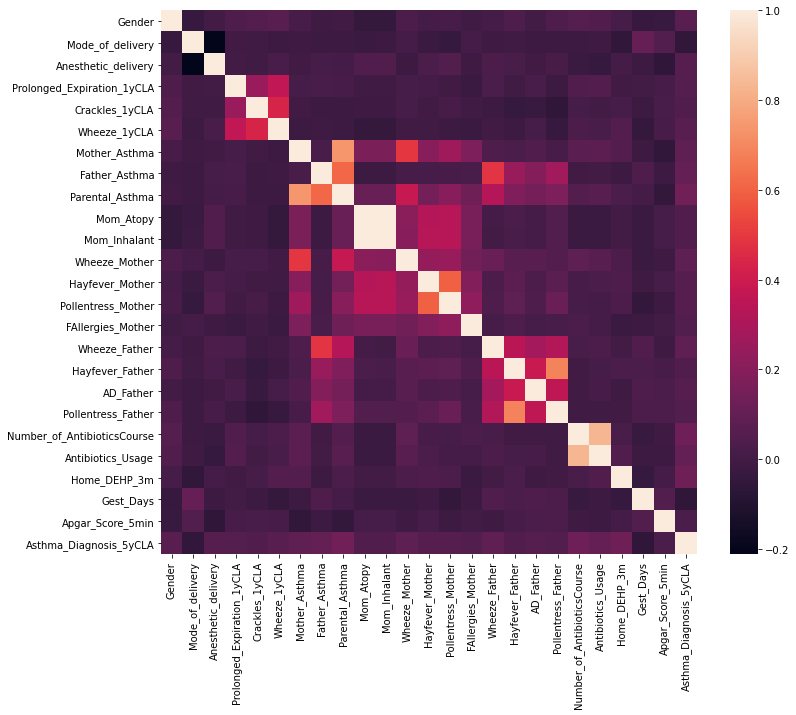

<IPython.core.display.Javascript object>

In [64]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_previous_ml.corr())

In [65]:
df = df_previous_ml.rename(columns={"Asthma_Diagnosis_5yCLA": "target"})

<IPython.core.display.Javascript object>

In [66]:
df

,Gender,Mode_of_delivery,Anesthetic_delivery,Prolonged_Expiration_1yCLA,Crackles_1yCLA,Wheeze_1yCLA,Mother_Asthma,Father_Asthma,Parental_Asthma,Mom_Atopy,...,Wheeze_Father,Hayfever_Father,AD_Father,Pollentress_Father,Number_of_AntibioticsCourse,Antibiotics_Usage,Home_DEHP_3m,Gest_Days,Apgar_Score_5min,target
53,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,322.105093,276.0,9.0,0.0
54,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,322.105093,292.0,6.0,0.0
55,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,322.105093,269.0,9.0,0.0
56,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,495.652022,279.0,10.0,0.0
57,1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,139.213172,273.0,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3448,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,322.105093,280.0,9.0,0.0
3450,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,274.867379,275.0,9.0,0.0
3451,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,78.581448,272.0,9.0,1.0
3453,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,322.105093,275.0,9.0,0.0


<IPython.core.display.Javascript object>

## Holdout for Final Test

In [69]:
holdout_df_withtarget1 = df[df.target == 1].sample(
    frac=0.25, replace=False, random_state=1
)
holdout_df_withtarget1.shape
holdout_df_withtarget0 = df[df.target == 0].sample(
    frac=0.04, replace=False, random_state=1
)
holdout_df_withtarget0.shape
holdout_df = pd.concat([holdout_df_withtarget0, holdout_df_withtarget1])
holdout_df

(41, 25)

(89, 25)

,Gender,Mode_of_delivery,Anesthetic_delivery,Prolonged_Expiration_1yCLA,Crackles_1yCLA,Wheeze_1yCLA,Mother_Asthma,Father_Asthma,Parental_Asthma,Mom_Atopy,...,Wheeze_Father,Hayfever_Father,AD_Father,Pollentress_Father,Number_of_AntibioticsCourse,Antibiotics_Usage,Home_DEHP_3m,Gest_Days,Apgar_Score_5min,target
291,0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,322.105093,292.0,9.0,0.0
1778,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,322.105093,266.0,9.0,0.0
639,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,322.105093,275.0,9.0,0.0
1779,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,322.105093,273.0,9.0,0.0
325,1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,249.865862,271.0,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,177.161034,268.0,9.0,1.0
1054,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,3.0,1.0,289.740414,283.0,9.0,1.0
1922,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,322.105093,287.0,9.0,1.0
3165,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,109.015419,280.0,9.0,1.0


<IPython.core.display.Javascript object>

In [71]:
df_rest = pd.concat(
    [df, holdout_df_withtarget1, holdout_df_withtarget0]
).drop_duplicates(keep=False)
df_rest.shape

X = df_rest.drop("target", 1)
y = df_rest.target

(2122, 25)

<IPython.core.display.Javascript object>

## Under Sampling 
Another option: Cluster:
Cluster centroids is a method that replaces cluster of samples by the cluster centroid of a K-means algorithm, where the number of clusters is set by the level of undersampling.

In [78]:
from imblearn.under_sampling import RandomUnderSampler

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy="majority")
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X, y)
y_under.value_counts()

0.0    124
1.0    124
Name: target, dtype: int64

<IPython.core.display.Javascript object>

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    roc_curve,
    classification_report,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
)
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.inspection import permutation_importance

<IPython.core.display.Javascript object>

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    X_under, y_under, test_size=0.2, stratify=y_under, random_state=0
)
X_train.columns
y_test.value_counts()

Index(['Gender', 'Mode_of_delivery', 'Anesthetic_delivery',
       'Prolonged_Expiration_1yCLA', 'Crackles_1yCLA', 'Wheeze_1yCLA',
       'Mother_Asthma', 'Father_Asthma', 'Parental_Asthma', 'Mom_Atopy',
       'Mom_Inhalant', 'Wheeze_Mother', 'Hayfever_Mother',
       'Pollentress_Mother', 'FAllergies_Mother', 'Wheeze_Father',
       'Hayfever_Father', 'AD_Father', 'Pollentress_Father',
       'Number_of_AntibioticsCourse', 'Antibiotics_Usage', 'Home_DEHP_3m',
       'Gest_Days', 'Apgar_Score_5min'],
      dtype='object')

0.0    25
1.0    25
Name: target, dtype: int64

<IPython.core.display.Javascript object>

# Logistic Regression

In [80]:
m1 = "Logistic Regression"
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_prec_score = precision_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Precison of Logistic Regression:", lr_prec_score * 100, "\n")
print(classification_report(y_test, lr_predict))
lr.coef_

confussion matrix
[[16  9]
 [ 9 16]]


Precison of Logistic Regression: 64.0 

              precision    recall  f1-score   support

         0.0       0.64      0.64      0.64        25
         1.0       0.64      0.64      0.64        25

    accuracy                           0.64        50
   macro avg       0.64      0.64      0.64        50
weighted avg       0.64      0.64      0.64        50



array([[ 1.13213753e-01, -5.47204496e-01,  1.13155235e+00,
         8.62986114e-02,  1.53347359e-01,  1.35395517e-01,
         5.93593637e-01,  6.13658917e-01,  5.78027202e-01,
         1.90724759e-01,  1.90724759e-01, -5.99722196e-02,
         2.45464484e-01, -6.26877544e-02,  4.24642390e-01,
         1.70547226e-01, -6.95581875e-02,  2.85830347e-01,
        -1.47634379e-01,  6.49206566e-02,  4.57820011e-01,
         1.02892549e-03, -2.56200832e-02,  5.52969164e-01]])

<IPython.core.display.Javascript object>

<Figure size 2400x1600 with 0 Axes>

<AxesSubplot:xlabel='Logistic Regression Coefficient'>

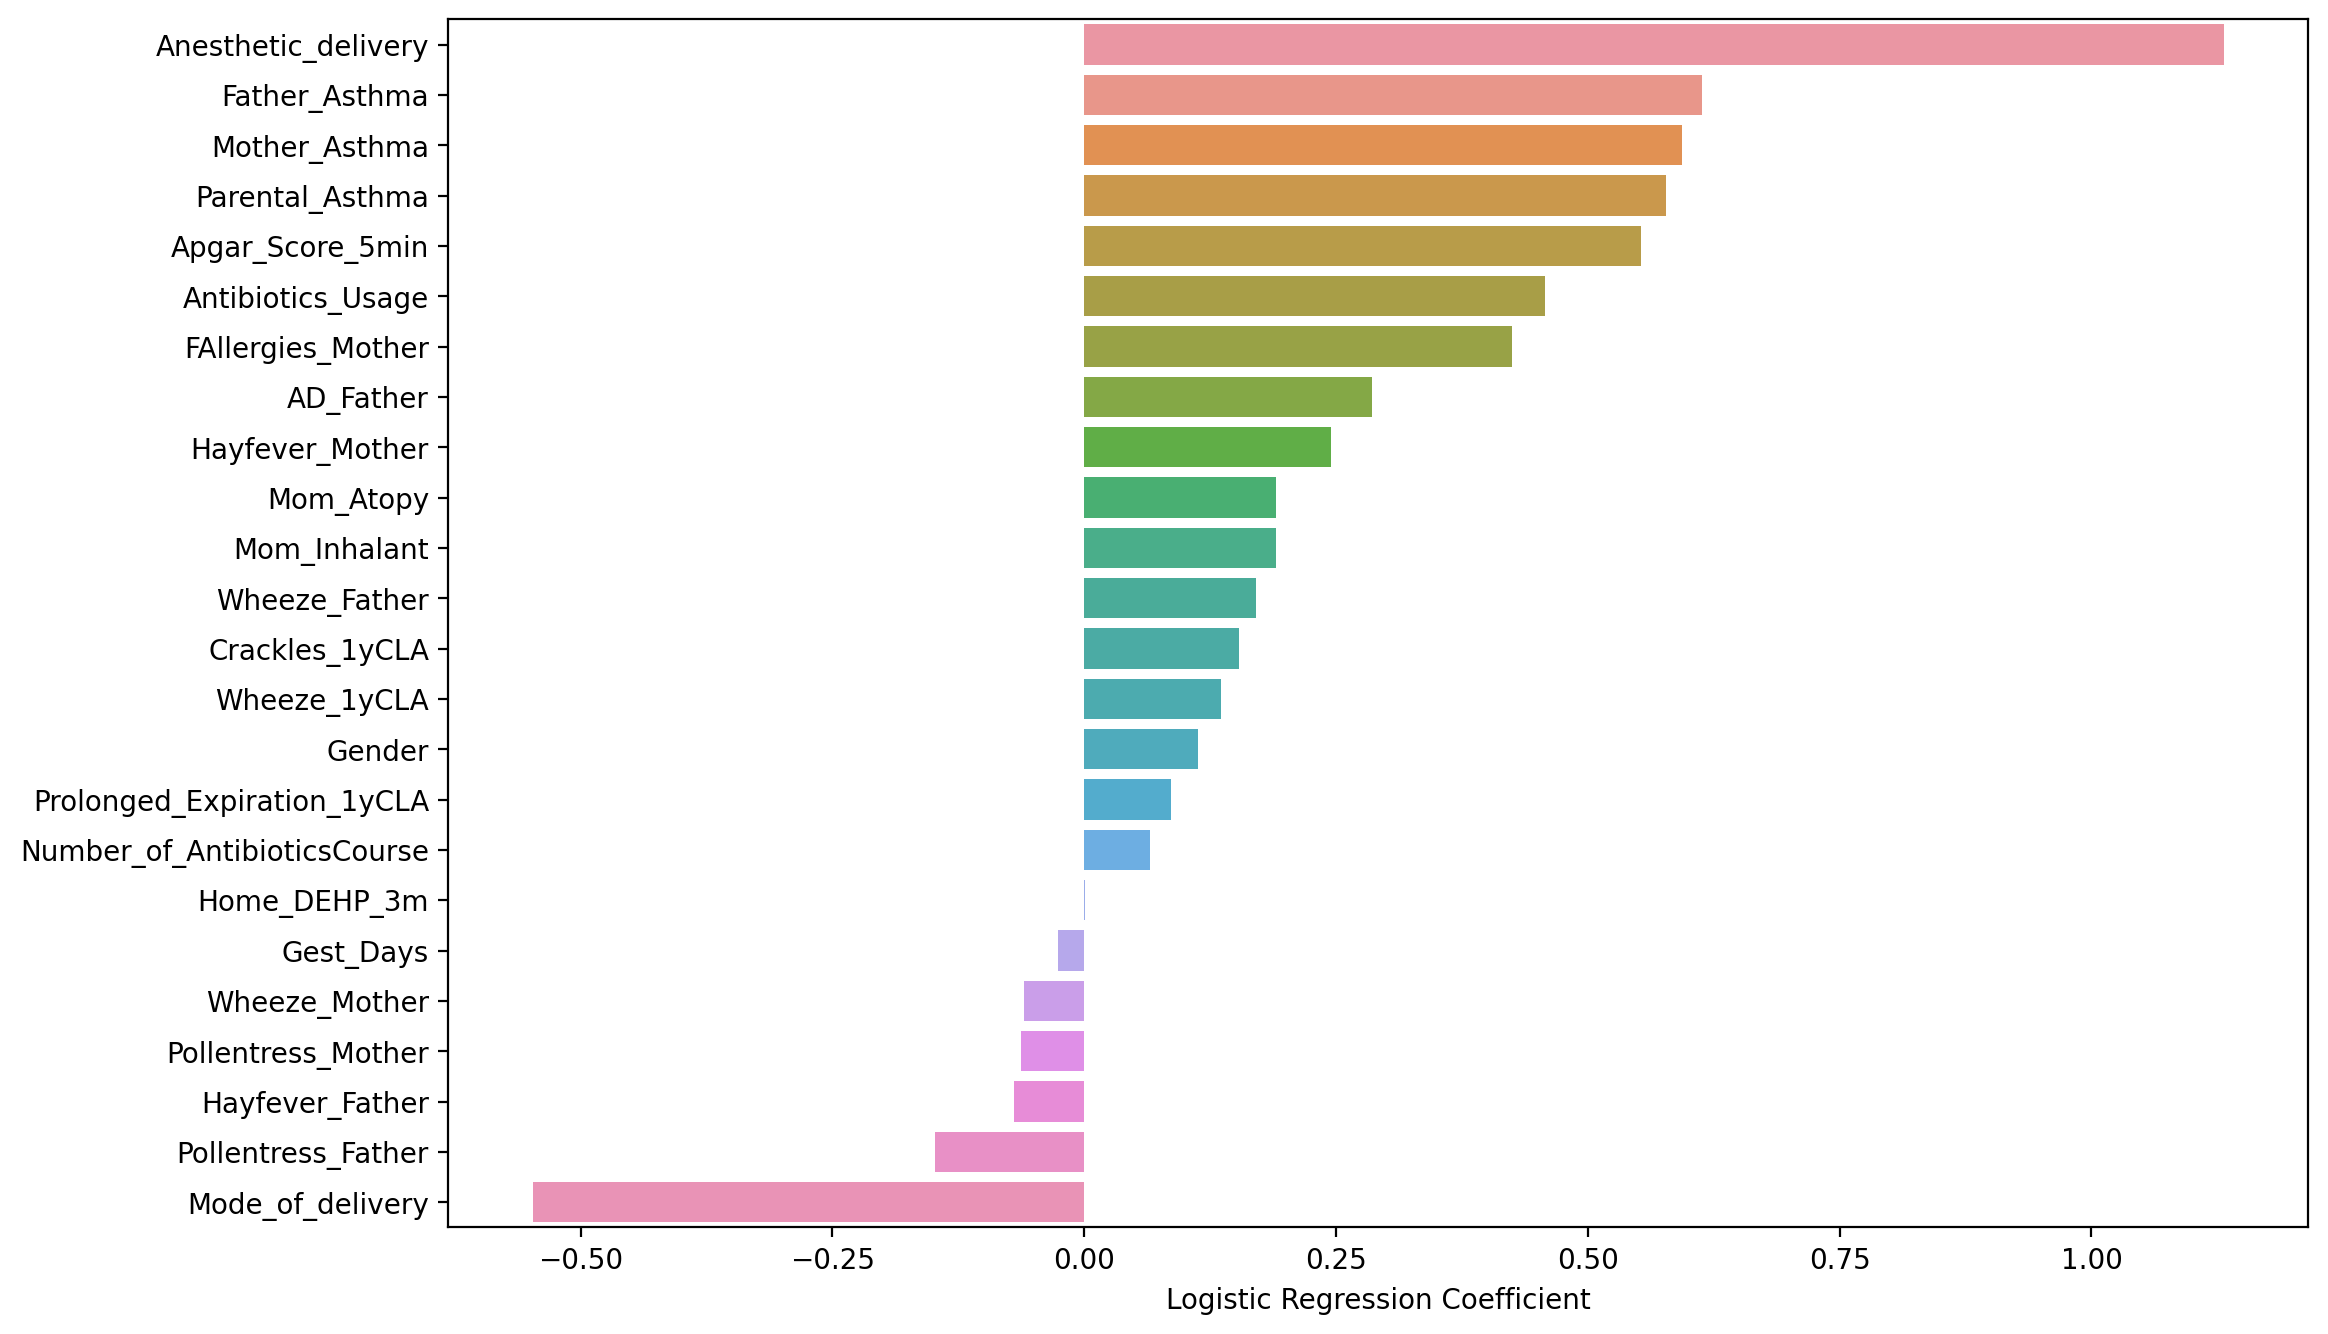

<IPython.core.display.Javascript object>

In [81]:
features_imp = lr.coef_.reshape((-1, 1))
imp_features = pd.DataFrame(
    index=X.columns, data=features_imp, columns=["Logistic Regression Coefficient"]
)
imp_features.sort_values(
    "Logistic Regression Coefficient", ascending=False, inplace=True
)
plt.figure(figsize=(12, 8), dpi=200)
sns.barplot(
    data=imp_features,
    y=imp_features.index,
    x=imp_features["Logistic Regression Coefficient"],
)

# Gaussian Naive Bayes

In [84]:
m2 = "Naive Bayes"
nb = GaussianNB()
nb.fit(X_train, y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_prec_score = precision_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Precison of Naive Bayes model:", nb_prec_score * 100, "\n")
print(classification_report(y_test, nbpred))

GaussianNB()

confussion matrix
[[22  3]
 [13 12]]


Precison of Naive Bayes model: 80.0 

              precision    recall  f1-score   support

         0.0       0.63      0.88      0.73        25
         1.0       0.80      0.48      0.60        25

    accuracy                           0.68        50
   macro avg       0.71      0.68      0.67        50
weighted avg       0.71      0.68      0.67        50



<IPython.core.display.Javascript object>

<Figure size 1440x720 with 0 Axes>

<BarContainer object of 24 artists>

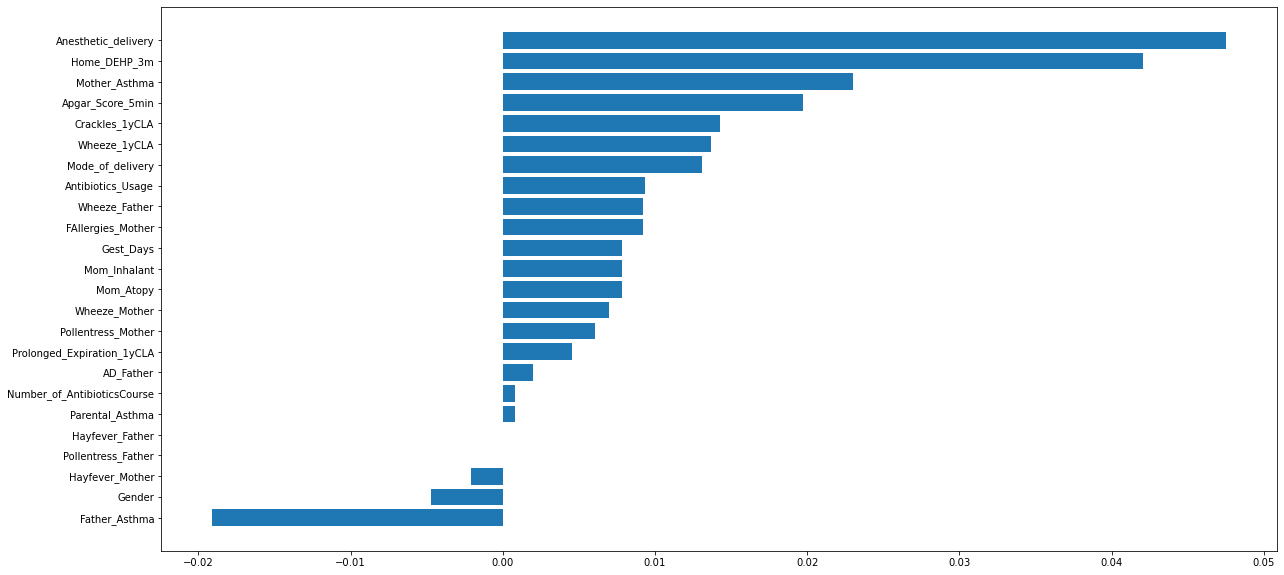

<IPython.core.display.Javascript object>

In [85]:
result = permutation_importance(
    nb, X_train, y_train, n_repeats=10, random_state=1012, scoring="precision"
)
perm_sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(20, 10))
plt.barh(
    width=result.importances_mean[perm_sorted_idx].T,
    # vert=False,
    y=X.columns[perm_sorted_idx],
)

# Random Forest Classfier

In [86]:
m3 = "Random Forest Classfier"
rf = RandomForestClassifier(n_estimators=20, random_state=12, max_depth=5)
rf.fit(X_train, y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_prec_score = precision_score(y_test, rf_predicted)
rf_auc_score = roc_auc_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Precision of Random Forest:", rf_prec_score * 100, "\n")
print("ROC_AUC of Random Forest:", rf_auc_score * 100, "\n")
print(classification_report(y_test, rf_predicted))

RandomForestClassifier(max_depth=5, n_estimators=20, random_state=12)

confussion matrix
[[18  7]
 [ 8 17]]


Precision of Random Forest: 70.83333333333334 

ROC_AUC of Random Forest: 70.0 

              precision    recall  f1-score   support

         0.0       0.69      0.72      0.71        25
         1.0       0.71      0.68      0.69        25

    accuracy                           0.70        50
   macro avg       0.70      0.70      0.70        50
weighted avg       0.70      0.70      0.70        50



<IPython.core.display.Javascript object>

<Figure size 2400x1600 with 0 Axes>

<AxesSubplot:xlabel='importance'>

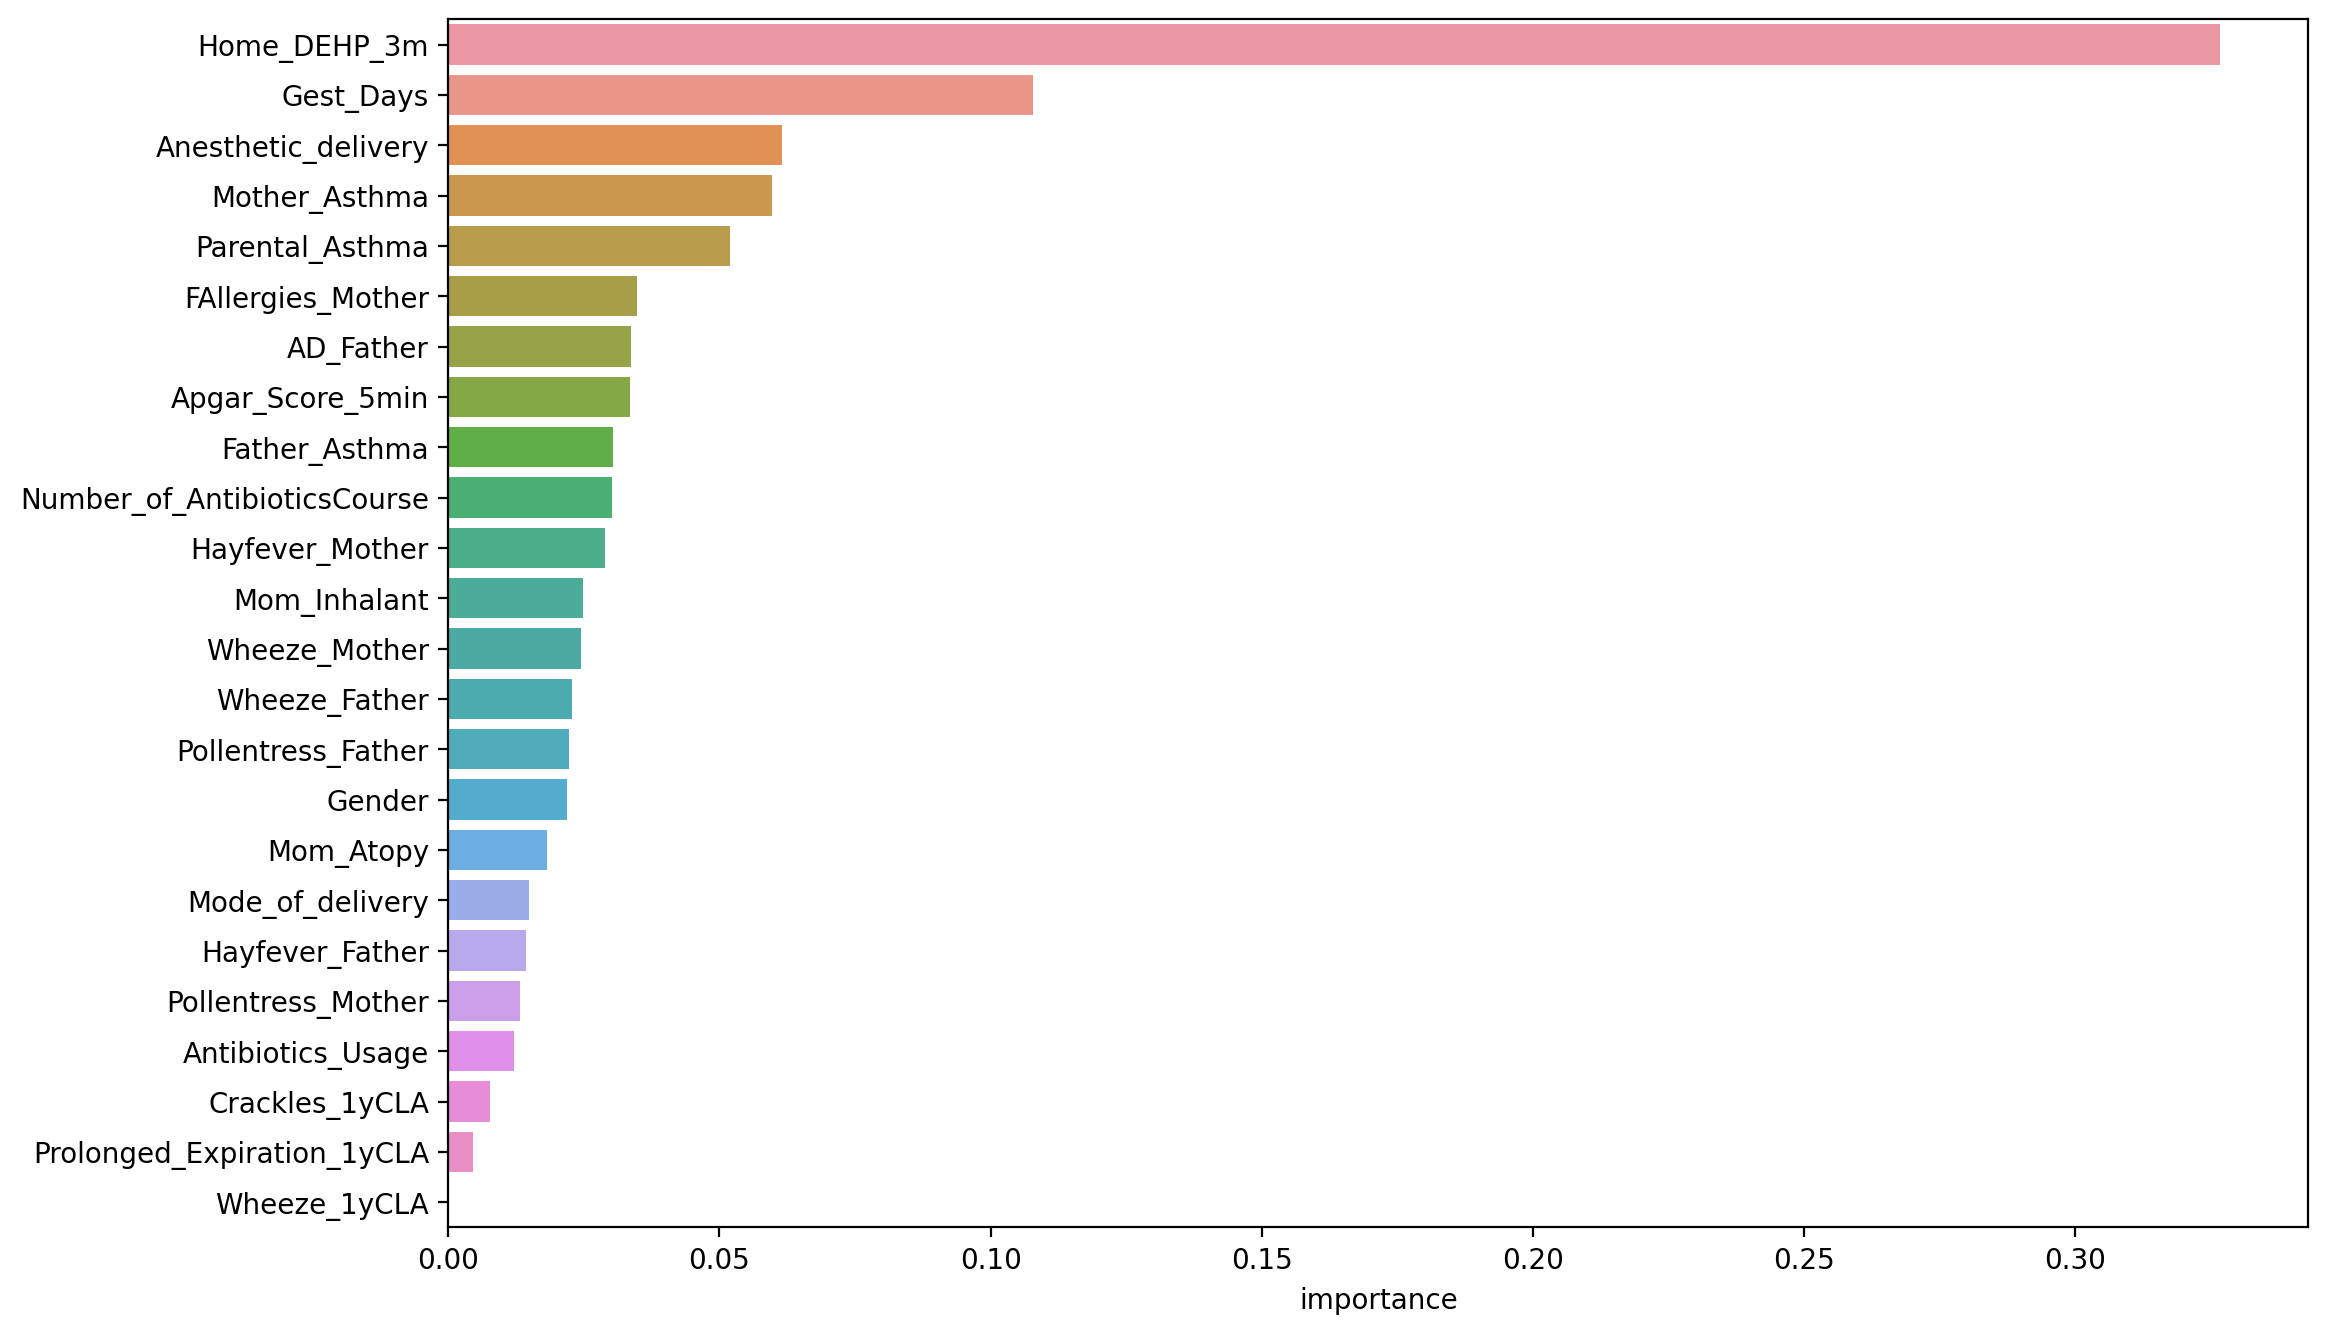

<IPython.core.display.Javascript object>

In [87]:
features_imp = rf.feature_importances_
imp_features = pd.DataFrame(index=X.columns, data=features_imp, columns=["importance"])
imp_features.sort_values("importance", ascending=False, inplace=True)
plt.figure(figsize=(12, 8), dpi=200)
sns.barplot(data=imp_features, y=imp_features.index, x=imp_features["importance"])

In [88]:
m4 = "K-NeighborsClassifier"
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_prec_score = precision_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Precison of K-NeighborsClassifier:", knn_prec_score * 100, "\n")
print(classification_report(y_test, knn_predicted))

KNeighborsClassifier(n_neighbors=12)

confussion matrix
[[19  6]
 [ 7 18]]


Precison of K-NeighborsClassifier: 75.0 

              precision    recall  f1-score   support

         0.0       0.73      0.76      0.75        25
         1.0       0.75      0.72      0.73        25

    accuracy                           0.74        50
   macro avg       0.74      0.74      0.74        50
weighted avg       0.74      0.74      0.74        50



<IPython.core.display.Javascript object>

In [89]:
m5 = "DecisionTreeClassifier"
dt = DecisionTreeClassifier(criterion="entropy", random_state=0, max_depth=6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_prec_score = precision_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Precison of DecisionTreeClassifier:", dt_prec_score * 100, "\n")
print(classification_report(y_test, dt_predicted))

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

confussion matrix
[[16  9]
 [ 8 17]]


Precison of DecisionTreeClassifier: 65.38461538461539 

              precision    recall  f1-score   support

         0.0       0.67      0.64      0.65        25
         1.0       0.65      0.68      0.67        25

    accuracy                           0.66        50
   macro avg       0.66      0.66      0.66        50
weighted avg       0.66      0.66      0.66        50



<IPython.core.display.Javascript object>

In [90]:
m6 = "Support Vector Classifier"
svc = SVC(kernel="rbf", C=6)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_prec_score = precision_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Precison of Support Vector Classifier:", svc_prec_score * 100, "\n")
print(classification_report(y_test, svc_predicted))

SVC(C=6)

confussion matrix
[[21  4]
 [15 10]]


Precison of Support Vector Classifier: 71.42857142857143 

              precision    recall  f1-score   support

         0.0       0.58      0.84      0.69        25
         1.0       0.71      0.40      0.51        25

    accuracy                           0.62        50
   macro avg       0.65      0.62      0.60        50
weighted avg       0.65      0.62      0.60        50



<IPython.core.display.Javascript object>

In [91]:
m7 = "Extreme Gradient Boost"
xgb = XGBClassifier(
    learning_rate=0.01,
    n_estimators=25,
    max_depth=15,
    gamma=0.6,
    subsample=0.52,
    colsample_bytree=0.6,
    seed=27,
    reg_lambda=2,
    booster="dart",
    colsample_bylevel=0.6,
    colsample_bynode=0.5,
)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_prec_score = precision_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Precison of Extreme Gradient Boost:", xgb_prec_score * 100, "\n")
print(classification_report(y_test, xgb_predicted))

[15:02:36] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=0.6,
              colsample_bynode=0.5, colsample_bytree=0.6, gamma=0.6, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=25, n_jobs=8, num_parallel_tree=1, random_state=27,
              reg_alpha=0, reg_lambda=2, scale_pos_weight=1, seed=27,
              subsample=0.52, tree_method='exact', validate_parameters=1,
              verbosity=None)

confussion matrix
[[20  5]
 [ 7 18]]


Precison of Extreme Gradient Boost: 78.26086956521739 

              precision    recall  f1-score   support

         0.0       0.74      0.80      0.77        25
         1.0       0.78      0.72      0.75        25

    accuracy                           0.76        50
   macro avg       0.76      0.76      0.76        50
weighted avg       0.76      0.76      0.76        50



<IPython.core.display.Javascript object>

In [92]:
model_ev = pd.DataFrame(
    {
        "Model": [
            "Logistic Regression",
            "Naive Bayes",
            "Random Forest",
            "K-Nearest Neighbour",
            "Decision Tree",
            "Support Vector Machine",
            "Extreme Gradient Boost",
        ],
        "Precison": [
            lr_prec_score * 100,
            nb_prec_score * 100,
            rf_prec_score * 100,
            knn_prec_score * 100,
            dt_prec_score * 100,
            svc_prec_score * 100,
            xgb_prec_score * 100,
        ],
    }
)
model_ev.sort_values(by="Precison", ascending=False)

,Model,Precison
1,Naive Bayes,80.000000
6,Extreme Gradient Boost,78.260870
3,K-Nearest Neighbour,75.000000
5,Support Vector Machine,71.428571
2,Random Forest,70.833333
4,Decision Tree,65.384615
0,Logistic Regression,64.000000


<IPython.core.display.Javascript object>

In [93]:
from collections import defaultdict

score_dict = defaultdict(list)

models = [lr, nb, rf, knn, dt, svc, xgb]
model_names = [
    "Logistic Regression",
    "Naive Bayes",
    "Random Forest",
    "K-Nearest Neighbour",
    "Decision Tree",
    "Support Vector Machine",
    "Extreme Gradient Boost",
]
measurements = [accuracy_score, f1_score, precision_score, recall_score, roc_auc_score]
measurement_names = ["Accuracy", "F1 score", "Precision", "Recall", "AUC"]

for i in range(len(models)):
    score_dict["Model"].append(model_names[i])
    for j in range(len(measurements)):
        score_dict[measurement_names[j]].append(
            measurements[j](y_test, models[i].predict(X_test))
        )

score_df = pd.DataFrame(score_dict)
score_df = score_df.set_index("Model")
score_df.style.background_gradient(cmap="Greens")

,Accuracy,F1 score,Precision,Recall,AUC
Model,,,,,
Logistic Regression,0.640000,0.640000,0.640000,0.640000,0.640000
Naive Bayes,0.680000,0.600000,0.800000,0.480000,0.680000
Random Forest,0.700000,0.693878,0.708333,0.680000,0.700000
K-Nearest Neighbour,0.740000,0.734694,0.750000,0.720000,0.740000
Decision Tree,0.660000,0.666667,0.653846,0.680000,0.660000
Support Vector Machine,0.620000,0.512821,0.714286,0.400000,0.620000
Extreme Gradient Boost,0.760000,0.750000,0.782609,0.720000,0.760000


<IPython.core.display.Javascript object>

dict_values(['Subject_Number', 'Wheeze_Mother', 'Asthma_Mother', 'Hayfever_Mother', 'AD_Mother', 'Pollentress_Mother', 'FAllergies_Mother', 'Wheeze_Father', 'Asthma_Father', 'Hayfever_Father', 'AD_Father', 'Pollentress_Father', 'FAllergies_Father'])

<IPython.core.display.Javascript object>

### 1. Previous 1y -> 5y prediction

In [2]:
# Preferences of autoformatting & Multiple Output
%load_ext nb_black
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
# Preferences - II
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import numpy as np

<IPython.core.display.Javascript object>

#### 1.1 Prepare dataset

In [6]:
!ls

CHILD_Asthma_Prediction_Modelling.ipynb CHILD_ml_pipeline.ipynb
CHILD_ML.ipynb


<IPython.core.display.Javascript object>